In [3]:
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

import cnn_builder as cbuild
import cnn_methods as cfunc
import config
import csv
import helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
import random
%matplotlib inline

Using TensorFlow backend.


In [260]:
importlib.reload(config)
importlib.reload(cfunc)
importlib.reload(hf)
importlib.reload(cbuild)
C = config.Config()

In [ ]:
cbuild.overnight_run(C)

In [239]:
model = cbuild.build_cnn(C, 'adam', f=[64,128,128,128], dropout=[0,0])#Adam(lr=.005)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_355 (InputLayer)           (None, 24, 24, 12, 1) 0                                            
____________________________________________________________________________________________________
input_356 (InputLayer)           (None, 24, 24, 12, 1) 0                                            
____________________________________________________________________________________________________
input_357 (InputLayer)           (None, 24, 24, 12, 1) 0                                            
____________________________________________________________________________________________________
conv3d_472 (Conv3D)              (None, 22, 22, 10, 64 1792        input_355[0][0]                  
___________________________________________________________________________________________

model = cbuild.run_cnn(model, C)

In [262]:
nb_classes = len(C.classes_to_include)
voi_df = pd.read_csv(C.art_voi_path)
orig_data_dict, num_samples = cfunc.collect_unaug_data(C, voi_df)
print(num_samples)

avg_X2 = {}
for cls in C.classes_to_include:
    avg_X2[cls] = np.mean(orig_data_dict[cls][1], axis=0)


hcc

cholangio

colorectal
E101346528,E101361319,E101665217,E101665217,E101665217,E102307147,E102857025,E103312835,E103312835,E103359656,E104243475,E104298604,E104298604,E104298604,E105057635,E105370029,E105370029,E105452218,E105452218,E105452218,E105474285,
cyst

hemangioma

fnh
12362250,12362250,12362250,12362250,12455319,12552705,12943872,E100168424,E100215900,E100215900,E100215900,E100215900,E100987314,E101099918,E101198113,E101749070,E102341190,E102798599,{'fnh': 87, 'hemangioma': 63, 'hcc': 99, 'cyst': 79, 'cholangio': 49}


KeyError: 'colorectal'

In [ ]:
train_ids = {} #filenames of training set originals
test_ids = {} #filenames of test set
X_test = []
X2_test = []
Y_test = []
Z_test = []
X_train_orig = []
X2_train_orig = []
Y_train_orig = []
Z_train_orig = []

train_samples = {}

for cls_num, cls in enumerate(orig_data_dict):
    cls_num = C.classes_to_include.index(cls)

    train_samples[cls] = round(num_samples[cls]*C.train_frac)

    order = np.random.permutation(list(range(num_samples[cls])))
    train_ids[cls] = list(orig_data_dict[cls][2][order[:train_samples[cls]]])
    test_ids[cls] = list(orig_data_dict[cls][2][order[train_samples[cls]:]])

    X_test = X_test + list(orig_data_dict[cls][0][order[train_samples[cls]:]])
    X2_test = X2_test + list(orig_data_dict[cls][1][order[train_samples[cls]:]])
    Y_test = Y_test + [[0] * cls_num + [1] + [0] * (nb_classes - cls_num - 1)] * \
                        (num_samples[cls] - train_samples[cls])
    Z_test = Z_test + test_ids[cls]

    X_train_orig = X_train_orig + list(orig_data_dict[cls][0][order[:train_samples[cls]]])
    X2_train_orig = X2_train_orig + list(orig_data_dict[cls][1][order[:train_samples[cls]]])
    Y_train_orig = Y_train_orig + [[0] * cls_num + [1] + [0] * (nb_classes - cls_num - 1)] * \
                        (train_samples[cls])
    Z_train_orig = Z_train_orig + train_ids[cls]

    print("%s has %d samples for training (%d after augmentation) and %d for testing" %
          (cls, train_samples[cls], train_samples[cls] * C.aug_factor, num_samples[cls] - train_samples[cls]))

#Y_test = np_utils.to_categorical(Y_test, nb_classes)
#Y_train_orig = np_utils.to_categorical(Y_train_orig, nb_classes)
X_test = [np.array(X_test), np.array(X2_test)]
X_train_orig = [np.array(X_train_orig), np.array(X2_train_orig)]

Y_test = np.array(Y_test)
Y_train_orig = np.array(Y_train_orig)

Z_test = np.array(Z_test)
Z_train_orig = np.array(Z_train_orig)

X_test = cfunc.separate_phases(X_test)
X_train_orig = cfunc.separate_phases(X_train_orig)

train_generator = train_generator_func()
model_pretrain.fit_generator(train_generator, steps_per_epoch=120, epochs=50)#, callbacks=[early_stopping])

In [ ]:
#early_stopping = EarlyStopping(monitor='acc', min_delta=0.01, patience=4)
train_generator = cbuild.train_generator_func(C, train_ids, voi_df, avg_X2, n=6, n_art=0)
hist = model.fit_generator(train_generator, steps_per_epoch=250, epochs=15)#, callbacks=[early_stopping])

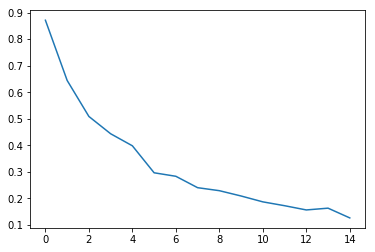

In [233]:
plt.plot(hist.history['loss'])

hist = model.fit(X_train2, Y_train2, batch_size=32, epochs=200, validation_data=(X_test, Y_test), callbacks=[early_stopping])

In [225]:
voi_df_art = pd.read_csv(C.art_voi_path)
voi_df_ven = pd.read_csv(C.ven_voi_path)
voi_df_eq = pd.read_csv(C.eq_voi_path)

with open(C.small_voi_path, 'r') as csv_file:
    reader = csv.reader(csv_file)
    small_vois = dict(reader)
for key in small_vois:
    small_vois[key] = [int(x) for x in small_vois[key][1:-1].split(', ')]

In [216]:
C.output_img_dir = "Z:\\OUTPUT\\12-fffff"
C.classes_to_include

['hcc', 'cholangio', 'colorectal', 'cyst', 'hemangioma', 'fnh']

-1.06165152979 0.521001031452 -0.126957557564


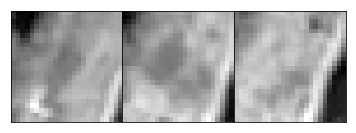

In [213]:
imgtrain = a[0][0][8]
img = imgtrain
hf.plot_section_auto_1ch(imgtrain[:,:,:,0])
print(np.amin(img), np.amax(img), np.mean(img))

-1.0 0.864150958951 -0.593503949765


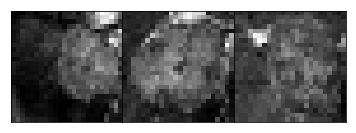

In [214]:
imgtest = X_test[0][8]
img = imgtest
print(np.amin(img), np.amax(img), np.mean(img))
hf.plot_section_auto_1ch(imgtest[:,:,:,0])

In [234]:
#plot_with_bbox(fn_list[2], cls_mapping[wrong_guesses[2]])
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

cfunc.save_output(Z_test, y_pred, y_true, voi_df_art, small_vois, C.classes_to_include, C)

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [227]:
Y_pred = model.predict(X_train_orig)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

cfunc.save_output(Z_train_orig, y_pred, y_true, voi_df_art, small_vois, C.classes_to_include, C)#, save_dir=C.output_img_dir+"\\training")

In [76]:
C.classes_to_include

['hcc', 'cholangio', 'colorectal', 'cyst', 'hemangioma', 'fnh']

In [236]:
cm

array([[ 0,  0,  0,  0,  0, 20],
       [ 0,  5,  0,  0,  3,  2],
       [ 0,  1,  5,  0,  5,  1],
       [ 0,  0,  0, 10,  6,  0],
       [ 0,  0,  0,  0, 11,  2],
       [ 0,  1,  0,  0,  0, 13]], dtype=int64)

In [167]:
y_true_simp, y_pred_simp, _ = cfunc.condense_cm(y_true, y_pred, C.classes_to_include)

In [168]:
accuracy_score(y_true_simp, y_pred_simp)

0.66265060240963858

In [235]:
accuracy_score(y_true, y_pred)

0.51764705882352946

In [ ]:
87%/91%

2d: 77%/84%, 74%/80%
3d: 78%/89%
2d bn: 77%/82%, 
3d bn: 84%/87%, 74%/83%
3d bn no artif: 84%/87%, 74%/83%
3d bn/elu/dilation/3conv/64-128-100-100: 80%/86%, 82%/88%, 84%/91%

fn_list = Z_test[~np.equal(y_pred, y_true)]
wrong_guesses = np.array(y_pred)[~np.equal(y_pred, y_true)]

activ = model2.predict(X_train)
#activ = model2.predict(np.expand_dims(X_train[10],axis=0))

import operator
#print("Ground truth:", [C.classes_to_include[max(enumerate(x), key=operator.itemgetter(1))[0]] for x in Y_val[::30]])
Y_ = model.predict(X_test)
print("Predictions:", [C.classes_to_include[max(enumerate(x), key=operator.itemgetter(1))[0]] + " (%.5f%% probability)" % (max(x)*100) for x in Y_])